![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

In [32]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [33]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

Con el objetivo de mejorar en análisis de la información se procede a dar uso a las siguientes métricas:

In [34]:
# Máximo
bikes.groupby('season').total.max()

season
1    801
2    873
3    977
4    948
Name: total, dtype: int64

In [35]:
# Mínimo
bikes.groupby('season').total.min()

season
1    1
2    1
3    1
4    1
Name: total, dtype: int64

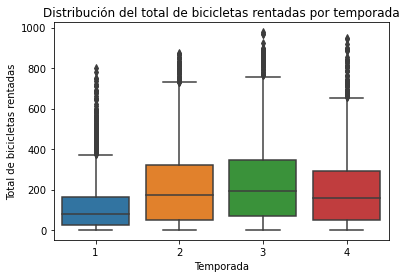

In [36]:
# Outliers
sns.boxplot(x='season', y='total', data=bikes)

# Agregar un título y etiquetas de los ejes
plt.title('Distribución del total de bicicletas rentadas por temporada')
plt.xlabel('Temporada')
plt.ylabel('Total de bicicletas rentadas')

# Mostrar el gráfico
plt.show()

### Análisis Descriptivo

Con las metricas utilizadas se pueden sacar las siguients conclusiones:

1. En el caso de la media se puede observar que en promedio durante el verano(3) se presentan el mayor número de bicicletas rentadas contrastado con invierno(1) donde en promedio se prestan menos. Esto se debe probablemente a los efectos que tiene la estación sobre el interés en transportarse en bicicleta por sus efectos en la temperatura y en la calidad de las ciclo rutas.
2. El máximo número de bicicletas rentadas ocurrio en verano(3) y en el caso de lo minimo se pudo ver que en todas las temporadas el número minimo de bicicletas rentadas fue 1.
3. Como se puede observar en la gráfica de distribución de bicicletas por temporada de forma general se ve el número de bicicletas rentadas se encuentra en lo más bajo durante el invierno(1) incrementandose hasta llegar a lo más alto en verano(3) disminuyendo nuevamente durante el otoño(4). Se puede observar que para las cuatro temporadas existen muchos varios valores atípicos lo cual se debe tomar en cuenta en el momento de elegir si se van a mantener dependiendo del modelo a usarse. 

In [37]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

Con el objetivo de mejorar en análisis de la información se procede a dar uso a las siguientes métricas:

In [38]:
# Máximo
bikes.groupby('hour').total.max()

hour
0     283
1     168
2     119
3      66
4      28
5      57
6     213
7     596
8     839
9     414
10    539
11    647
12    757
13    729
14    730
15    724
16    783
17    970
18    977
19    743
20    551
21    584
22    502
23    256
Name: total, dtype: int64

In [39]:
# Mínimo
bikes.groupby('hour').total.min()

hour
0      2
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      8
9     14
10    17
11    10
12     3
13    11
14    12
15     7
16    11
17    15
18    23
19    11
20    11
21     6
22     9
23     4
Name: total, dtype: int64

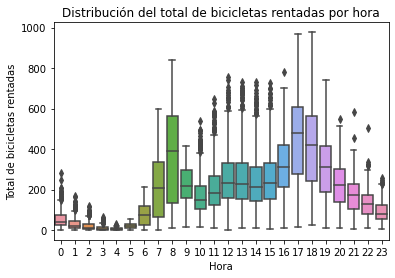

In [40]:
# Outliers
sns.boxplot(x='hour', y='total', data=bikes)

# Agregar un título y etiquetas de los ejes
plt.title('Distribución del total de bicicletas rentadas por hora')
plt.xlabel('Hora')
plt.ylabel('Total de bicicletas rentadas')

# Mostrar el gráfico
plt.show()

#### Análisis Descriptivo

Con las metricas utilizadas se pueden sacar las siguients conclusiones:

1. En el caso de la media se puede observar que en promedio la mayoria de las bicicletas son rentadas a las 17:00 y el minimo a las 4:00. Esto se debe probablemente a los efectos que tiene la hora en ciertas caracteristicas como el nivel de iluminación que se presenta en las ciclo rutas, etc.
2. El máximo número de bicicletas rentadas ocurrio a las 18:00 y en el caso de lo minimo se pudo ver que se presento una renta de 1 entre las horas de 1:00 a 7:00.
3. Como se puede observar en la gráfica de distribución de bicicletas por hora de forma general se ve un alto uso de bicilcetas durante las 8:00 y las 17:00 y 18:00 horas en las que las personas pueden estar teniendo interés en realizar una actividad fisica. Además se pudo detectar que la mayoria de los valores atipicos o outliers se encuentran entre las 10:00 a las 15:00.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

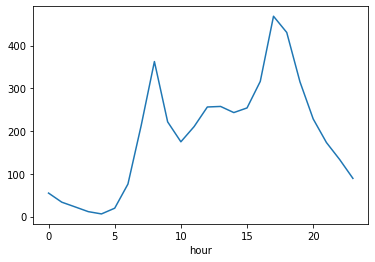

In [41]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

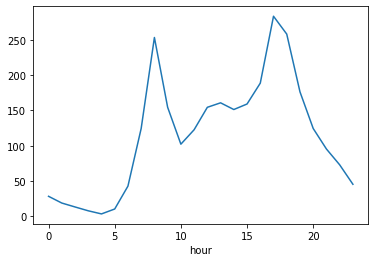

In [42]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
invierno = bikes[bikes['season'] == 1]
invierno.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

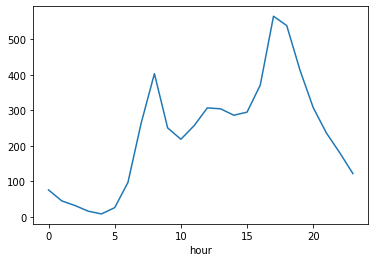

In [43]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
verano = bikes[bikes['season'] == 3]
verano.groupby('hour').total.mean().plot()

#### Análisis de hallazgos:

Comos se puede observar en las gráficas el comportamiento del número de rentas por hora presenta el mismo comportamiento a pesar del cambio de estaciones esto puede llevar a concluir que el efecto de las horas sobre la renta de bicicletas no es estacional (no se ve afectado por las diferentes estaciones) lo cual podría indicar que no existe una correlación entre ambos campos (Esto debe verificarse)

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [44]:
# Celda 3

## Se importa la libreria para dar manejo a la variable categorica de season


## Se procede a crear dummies

df_regresion = bikes
dummies = pd.get_dummies(df_regresion['season'], drop_first = True)
df_regresion = pd.concat([df_regresion, dummies], axis = 1)
df_regresion = df_regresion.drop(columns=['season'])

df_regresion.columns

Index([   'holiday', 'workingday',    'weather',       'temp',      'atemp',
         'humidity',  'windspeed',     'casual', 'registered',      'total',
             'hour',            2,            3,            4],
      dtype='object')

In [45]:
# Se toman las variables independientes:
X = df_regresion.loc[:, ['hour', 2, 3, 4]]

# Se realiza la regresión:
model = LinearRegression().fit(X, df_regresion['total'])

# Imprimir los coeficientes
print('Intercept:', model.intercept_)
print('Coeficientes:', model.coef_)

Intercept: -6.430262462306189
Coeficientes: [ 10.54520609 100.31723192 119.46754995  84.08311787]


Los resultados del modelo de regresión lineal indican que el número total de bicicletas rentadas está positivamente relacionado con la hora del día, y que esta relación varía según la estación. El coeficiente para la variable "hour" es 10.55, lo que significa que por cada aumento de una hora en el día, se espera que el número total de bicicletas rentadas aumente en 10.55 unidades, manteniendo constante la estación. Además, los coeficientes de las variables dummy creadas indican cuánto cambia el número total de bicicletas rentadas para cada estación, en comparación con el invierno

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [46]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001
# Definición de las variables X y Y
X = bikes.loc[:, ['hour', 'season']]
y = bikes['total']

In [47]:
## Transformación de variables dummies
dummy_season = pd.get_dummies(X['season'], prefix='season', drop_first = True)
X = pd.concat([X, dummy_season], axis=1)
X = X.drop(columns=['season'])
X.head()

,hour,season_2,season_3,season_4
datetime,,,,
2011-01-01 00:00:00,0,0,0,0
2011-01-01 01:00:00,1,0,0,0
2011-01-01 02:00:00,2,0,0,0
2011-01-01 03:00:00,3,0,0,0
2011-01-01 04:00:00,4,0,0,0


In [48]:
# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, bikes['total'], test_size=0.2, random_state=42)

In [49]:
# Impresión variable a usar (hour)
j = 0
print(X_train.columns[j])

hour


In [50]:
# División de la variable Hora en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X_train.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

array([ 0.,  2.,  4.,  7.,  9., 12., 14., 16., 19., 21.])

In [51]:
# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=5
filter_l = X_train.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y_train.loc[filter_l]
y_r = y_train.loc[~filter_l]

In [52]:
# Definición de la función que calcula el MSE
def MSE(y):
    if y.shape[0] == 0:
        return 0
    else:
        v_real = y
        v_pred = y.mean()
        MSE = ((v_real - v_pred)**2).mean()
        return MSE

In [53]:
# Definición de la función mse para calular la ganancia de una variable predictora j dado el punto de corte k
def mse_total(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    mse_y = MSE(y)
    mse_l = MSE(y_l)
    mse_r = MSE(y_r)
    
    mse = (n_l / (n_l + n_r) * mse_l + n_r / (n_l + n_r) * mse_r)
    
    return mse

In [54]:
mse_total(X_train.iloc[:, j], y_train, splits[k])

27454.35252865446

In [55]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
# En este caso ya que busco el menor MSE se busca el gain más pequeño
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, float('inf')]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = mse_total(X.iloc[:, j], y, split)
                        
            if gain < best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [56]:
# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X_train, y_train, 5)
j, split, gain

(0, 8.0, 23532.918882305043)

In [57]:
# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X_train.iloc[:, j] < split

y_l = y_train.loc[filter_l]
y_r = y_train.loc[~filter_l]

In [58]:
y_train.shape[0], y_l.shape[0], y_r.shape[0]

(8708, 2870, 5838)

In [59]:
y_train.mean(), y_l.mean(), y_r.mean()

(191.58474965548922, 54.57560975609756, 258.9393627954779)

In [60]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = y.mean() 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [61]:
# Aplicación de la función tree_grow
tree_1 = tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=1, num_pct=10)
tree_1

{'y_pred': 191.58474965548922,
 'y_prob': 191.54087256027555,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 8708,
 'gain': 23532.918882305043,
 'sl': {'y_pred': 54.57560975609756,
  'y_prob': 54.53795264623955,
  'level': 1,
  'split': -1,
  'n_samples': 2870,
  'gain': 4311.239268928511},
 'sr': {'y_pred': 258.9393627954779,
  'y_prob': 258.8508561643836,
  'level': 1,
  'split': -1,
  'n_samples': 5838,
  'gain': 27517.778369027827}}

In [62]:
## Resultado del Punto 4
tree = tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=3, num_pct=10)
tree

{'y_pred': 191.58474965548922,
 'y_prob': 191.54087256027555,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 8708,
 'gain': 23532.918882305043,
 'sl': {'y_pred': 54.57560975609756,
  'y_prob': 54.53795264623955,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 2870,
  'gain': 4311.239268928511,
  'sl': {'y_pred': 32.60739856801909,
   'y_prob': 32.5818759936407,
   'level': 2,
   'split': [0, 6.0],
   'n_samples': 2514,
   'gain': 1187.5157216277203,
   'sl': {'y_pred': 25.094243268337976,
    'y_prob': 25.071428571428573,
    'level': 3,
    'split': -1,
    'n_samples': 2154,
    'gain': 714.1159427556493},
   'sr': {'y_pred': 77.56111111111112,
    'y_prob': 77.1353591160221,
    'level': 3,
    'split': -1,
    'n_samples': 360,
    'gain': 2833.6277257872853}},
  'sr': {'y_pred': 209.71067415730337,
   'y_prob': 208.54189944134077,
   'level': 2,
   'split': [2, 1.0],
   'n_samples': 356,
   'gain': 23076.610297521358,
   'sl': {'y_pred': 192.30711610486892,
    'y_prob': 190.881

In [63]:
## Funcion para predecir el arbol
def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [64]:
# Prediccion del arbol
tree_predict(X_test, tree)

array([247.85449554,  77.56111111, 353.14309121, ..., 247.85449554,
        25.09424327, 247.85449554])

In [65]:
## Calcular el MSE del arbol 
## Se crea la función 

def mse_manual(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

## Se aplica
y_pred = tree_predict(X_test, tree_1)
mse_tree = mse_manual(y_test, y_pred)
mse_tree

24248.993190526922

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [66]:
# Celda 5

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, bikes['total'], test_size=0.2, random_state=42)

# Crear una instancia de DecisionTreeRegressor y ajustar el modelo a los datos de entrenamiento
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
tree_reg.fit(X_train, y_train)

# Hacer predicciones sobre los datos de validación
y_pred = tree_reg.predict(X_test)

# Calcular el MSE del modelo
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 13455.582335432264


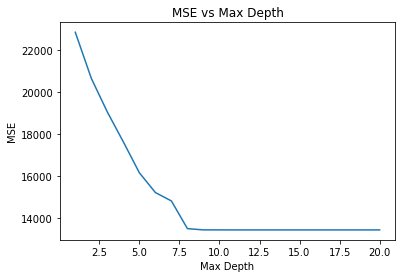

In [67]:
max_depth_range = range(1, 21)
mse_scores = []

for depth in max_depth_range:
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(X_train, y_train)
    y_pred = tree_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

plt.plot(max_depth_range, mse_scores)
plt.xlabel('Max Depth')
plt.ylabel('MSE')
plt.title('MSE vs Max Depth')
plt.show()

In [68]:
## Mejor profundidad
sorted(zip(mse_scores, max_depth_range))[0]

(13454.101382166964, 11)

In [69]:
## Con base en lo anterior se obtiene el arbol de decision con el menor MSE

X_train, X_test, y_train, y_test = train_test_split(X, bikes['total'], test_size=0.2, random_state=42)

tree_reg = DecisionTreeRegressor(max_depth=11, min_samples_split=5, random_state=42)
tree_reg.fit(X_train, y_train)

# Hacer predicciones sobre los datos de validación
y_pred = tree_reg.predict(X_test)

# Calcular el MSE del modelo
mse_sklearn = mean_squared_error(y_test, y_pred)
mse_sklearn

13454.101382166964

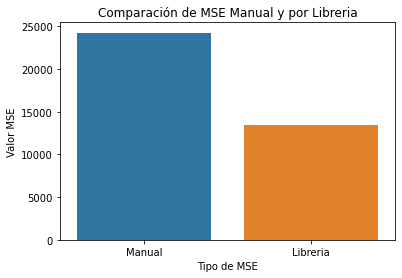

In [70]:
data = pd.DataFrame({'Tipo de MSE': ['Manual', 'Libreria'], 'Valor MSE': [mse_tree, mse_sklearn]})
sns.barplot(x='Tipo de MSE', y='Valor MSE', data=data)
plt.xlabel('Tipo de MSE')
plt.ylabel('Valor MSE')
plt.title('Comparación de MSE Manual y por Libreria')
plt.show()

Como se puede observar si se compara el MSE que se obtiene del Árbol de Decisión con Librería y el obtenido manualmente el segundo fue mucho mejor con un MSE menor  

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [71]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [72]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [73]:
# División de la muestra en set de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [74]:
# Celda 6


## Arbol de Decisión
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

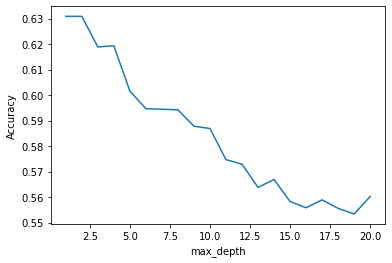

In [75]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [76]:
## Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308888888888888, 2)

In [77]:
## max_depth=2 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [78]:
## Desempeño del árbol de decisión
y_pred_tree = clf.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print("Accuracy del árbol de decisión: {:.2f}".format(acc_tree))
print("F1-Score del árbol de decisión: {:.2f}".format(f1_tree))

Accuracy del árbol de decisión: 0.65
F1-Score del árbol de decisión: 0.64


In [79]:
## Se corre el modelo de regresión logistica
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)
## Desempeño de la regresión logistica
y_pred_logreg = logreg.predict(X_test)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print("Accuracy de la regresión logística: {:.2f}".format(acc_logreg))
print("F1-Score de la regresión logística: {:.2f}".format(f1_logreg))

Accuracy de la regresión logística: 0.61
F1-Score de la regresión logística: 0.61


Con base en los resultados observados se puede concluir que el árbol de decisión parece tener un mejor desempeño que la regresión logística en términos de Accuracy y F1-Score en este conjunto de datos.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [81]:
# Celda 7


# Definir modelos base
tree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5, random_state=1), n_estimators=100, bootstrap=True,
                        random_state=42,max_samples=300, n_jobs=-1, oob_score=True)
tree2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=10, random_state=1), n_estimators=100, bootstrap=True,
                        random_state=41,max_samples=300, n_jobs=-1, oob_score=True)
logreg = BaggingClassifier(base_estimator=LogisticRegression(random_state=1), n_estimators=100, bootstrap=True,
                        random_state=40,max_samples=300, n_jobs=-1, oob_score=True)

# Definir ensamble con votación mayoritaria
ensemble = VotingClassifier(estimators=[('tree1', tree1), ('tree2', tree2), ('logreg', logreg)], voting='hard')

# Entrenar modelos base y ensamble
tree1.fit(X_train, y_train)
tree2.fit(X_train, y_train)
logreg.fit(X_train, y_train)

ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('tree1',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                                      random_state=1),
                                                max_samples=300,
                                                n_estimators=100, n_jobs=-1,
                                                oob_score=True,
                                                random_state=42)),
                             ('tree2',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=10,
                                                                                      random_state=1),
                                                max_samples=300,
                                                n_estimators=100, n_jobs=-1,
                                                oob_score=True,
                               

In [82]:
# Evaluar modelos base

# Árbol de decisión 1
y_pred_tree1 = tree1.predict(X_test)
acc_tree1 = accuracy_score(y_test, y_pred_tree1)
f1_tree1 = f1_score(y_test, y_pred_tree1)

# Árbol de decisión 2
y_pred_tree2 = tree2.predict(X_test)
acc_tree2 = accuracy_score(y_test, y_pred_tree2)
f1_tree2 = f1_score(y_test, y_pred_tree2)

# Regresión logística
y_pred_logreg = logreg.predict(X_test)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

# Ensamble
y_pred_ensemble = ensemble.predict(X_test)
acc_ensemble = accuracy_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)

print("Accuracy Árbol de Decisión 1: ", acc_tree1)
print("F1-Score Árbol de Decisión 1: ", f1_tree1)
print("Accuracy Árbol de Decisión 2: ", acc_tree2)
print("F1-Score Árbol de Decisión 2: ", f1_tree2)
print("Accuracy Regresión Logística: ", acc_logreg)
print("F1-Score Regresión Logística: ", f1_logreg)
print("Accuracy Ensamble: ", acc_ensemble)
print("F1-Score Ensamble: ", f1_ensemble)

Accuracy Árbol de Decisión 1:  0.6573333333333333
F1-Score Árbol de Decisión 1:  0.6517615176151762
Accuracy Árbol de Decisión 2:  0.6593333333333333
F1-Score Árbol de Decisión 2:  0.6540284360189573
Accuracy Regresión Logística:  0.6206666666666667
F1-Score Regresión Logística:  0.6121336059986366
Accuracy Ensamble:  0.658
F1-Score Ensamble:  0.6507828454731109


Como se puede observar en este caso el Árbol de Decisión 2 parece tener mejor resultado que el modelo de ensemble

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [83]:
# Celda 8

# Definir modelos base
tree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5, random_state=1), n_estimators=100, bootstrap=True,
                        random_state=42,max_samples=300, n_jobs=-1, oob_score=True)
tree2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=10, random_state=1), n_estimators=100, bootstrap=True,
                        random_state=41,max_samples=300, n_jobs=-1, oob_score=True)
logreg = BaggingClassifier(base_estimator=LogisticRegression(random_state=1), n_estimators=100, bootstrap=True,
                        random_state=40,max_samples=300, n_jobs=-1, oob_score=True)

# Entrenar modelos y ensamble
tree1.fit(X_train, y_train)
tree2.fit(X_train, y_train)
logreg.fit(X_train, y_train)

oob_scores = [tree1.oob_score_, tree2.oob_score_, logreg.oob_score_]

# Normalización de los pesos
weights = [score / sum(oob_scores) for score in oob_scores]

# Crear modelo ponderado
ensemble = VotingClassifier([('tree1', tree1), ('tree2', tree2), ('logreg', logreg)], voting='soft', weights=weights)

# Entrenar modelo ponderado
ensemble.fit(X, y)

# Evaluar modelos y ensamble
print("Accuracy tree1: {:.4f}".format(tree1.score(X, y)))
print("F1-Score tree1: {:.4f}".format(f1_score(y, tree1.predict(X))))
print("Accuracy tree2: {:.4f}".format(tree2.score(X, y)))
print("F1-Score tree2: {:.4f}".format(f1_score(y, tree2.predict(X))))
print("Accuracy logreg: {:.4f}".format(logreg.score(X, y)))
print("F1-Score logreg: {:.4f}".format(f1_score(y, logreg.predict(X))))
print("Accuracy ensemble: {:.4f}".format(ensemble.score(X, y)))
print("F1-Score ensemble: {:.4f}".format(f1_score(y, ensemble.predict(X))))

Accuracy tree1: 0.6700
F1-Score tree1: 0.6646
Accuracy tree2: 0.6677
F1-Score tree2: 0.6631
Accuracy logreg: 0.6253
F1-Score logreg: 0.6163
Accuracy ensemble: 0.6668
F1-Score ensemble: 0.6726


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

### Celda 9
Como se puede observar en el caso de los resultados obtenidos se puede ver que a través de la metodología de combinación se logro mejorar en cierta medida el valor de las metricas de evaluación, más esto no aplico en todos los casos, con el metodo ponderado comportandose de forma un poco más eficiente. Esto puede ser consecuencia del hecho de que los arboles de decisión presentaban valores de accuracy y f1-Score mejores relativos a la regresion logistica. Esto quiere decir que aunque estos metodos de combinación tengan ventajas es importante verificar bien que modelos se estan combinando pues si uno tiene un rendimiento más bajo que otros puede afectar su habilidad predictiva.